# Демонстрация. Ошибки I и II рода

Отрисовка ошибок I и II рода.

**Черная линия** - критическое значение теста.
- Часть распределения H0 справа от него — ошибка I рода.
- Часть распределения H1 слева от него — ошибка II рода. 

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, norm
import seaborn as sns
import matplotlib.pyplot as plt
import time

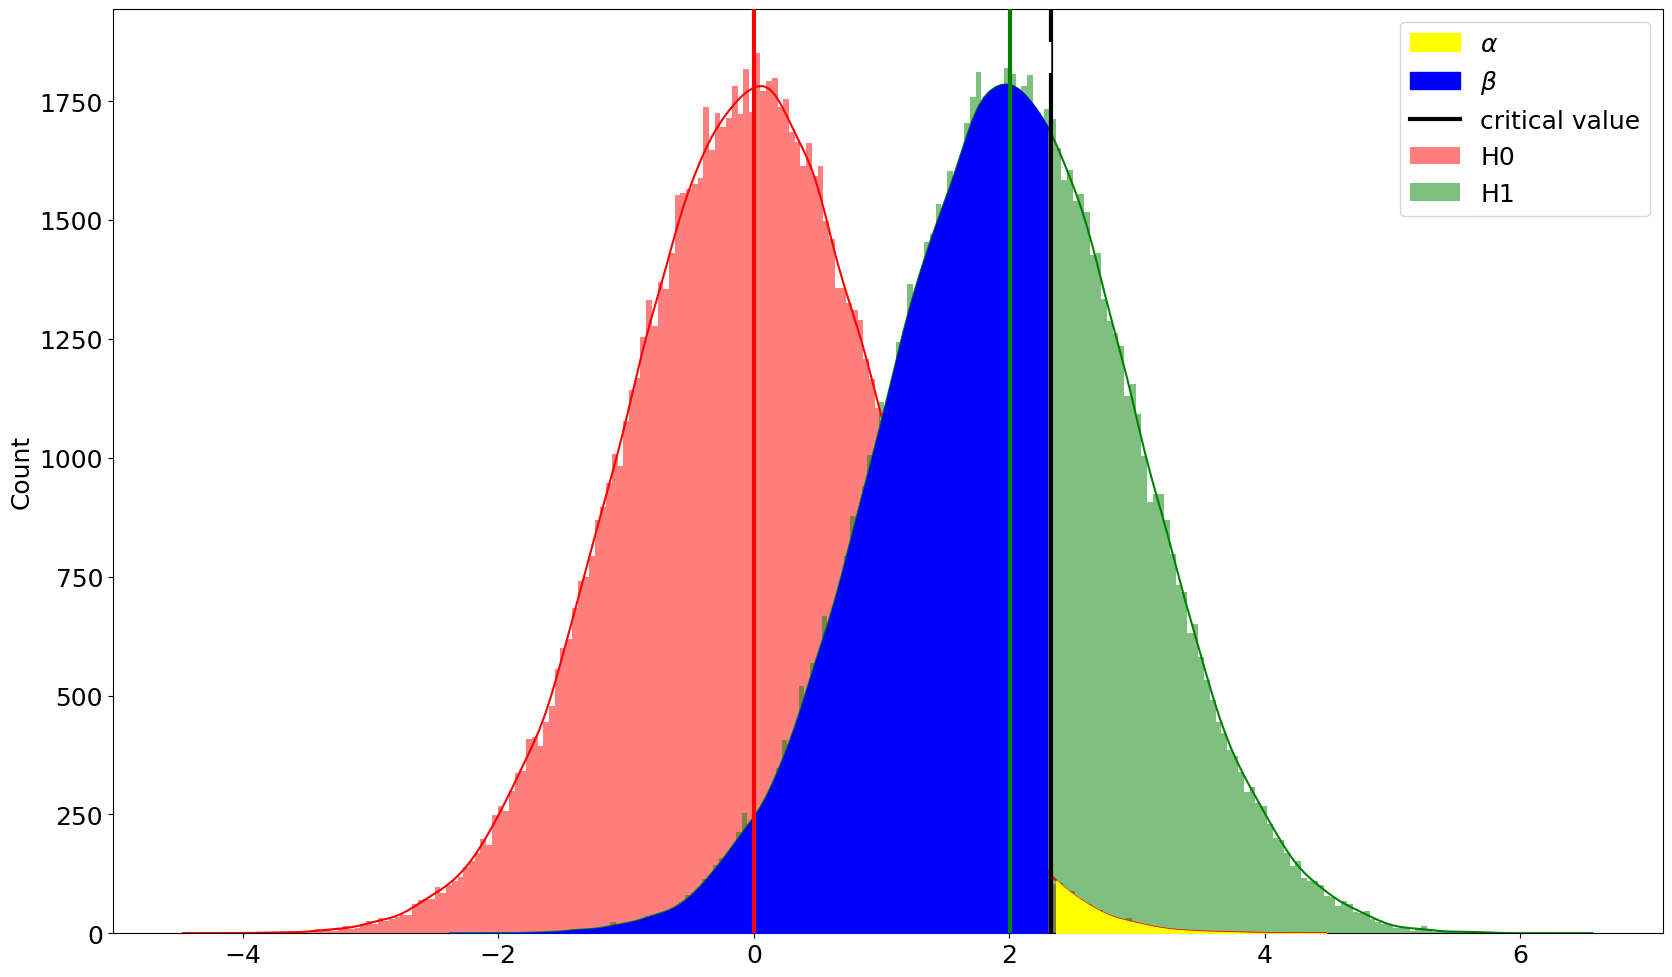

In [4]:
plt.rcParams.update({'font.size': 18})
np.random.seed(42)

n_obs = 100_000

effect_size = 2
std = 1

h0 = np.random.normal(0, std, n_obs)
h1 = np.random.normal(effect_size, std, n_obs)


bins = 100
h0_mean = np.mean(h0)
h1_mean = np.mean(h1)
alpha = 0.01
threshold = np.quantile(h0, 1 - alpha)


fig, ax = plt.subplots(figsize=(20, 12))
text_height = np.histogram(h0, bins=bins)[0][bins//2] // 2
ax.text(h0_mean + 0.1, text_height, 'H0', color='White', fontsize='xx-large')
ax.text(h1_mean + 0.1, text_height, 'H1', color='White', fontsize='xx-large')
sns.histplot(h0, bins=200, kde=True, ax=ax, linewidth=0, color='Red', label='H0', alpha=0.5)
sns.histplot(h1, bins=200, kde=True, ax=ax, linewidth=0, color='Green',label='H1',  alpha=0.5)
kde_xdata, kde_ydata= ax.lines[0].get_data()
ax.fill_between(kde_xdata, kde_ydata, where=(kde_xdata > threshold), color='Yellow', label=r'$\alpha$', 
                alpha=1, zorder=10)
kde_xdata, kde_ydata= ax.lines[1].get_data()
ax.fill_between(kde_xdata, kde_ydata, where=(kde_xdata < threshold), color='Blue', label=r'$\beta$', 
                alpha=1, zorder=10)
ax.axvline(x=h0_mean, linewidth=3, color='Red', zorder=20)
ax.axvline(x=h1_mean, linewidth=3, color='Green', zorder=20)
ax.axvline(x=threshold, linewidth=3, color='Black', label='critical value')
ax.legend()
plt.show()